Epoch 1/100
25/25 [==============================] - 2s 35ms/step - loss: 1.1315 - val_loss: 1.1792
Epoch 2/100
25/25 [==============================] - 0s 11ms/step - loss: 1.0436 - val_loss: 1.0928
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.9763 - val_loss: 1.0141
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.9209 - val_loss: 0.9394
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.8715 - val_loss: 0.8674
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 0.8264 - val_loss: 0.8014
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.7857 - val_loss: 0.7439
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7498 - val_loss: 0.6946
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7190 - val_loss: 0.6538
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6934 - val_loss: 0.6207
Epoch

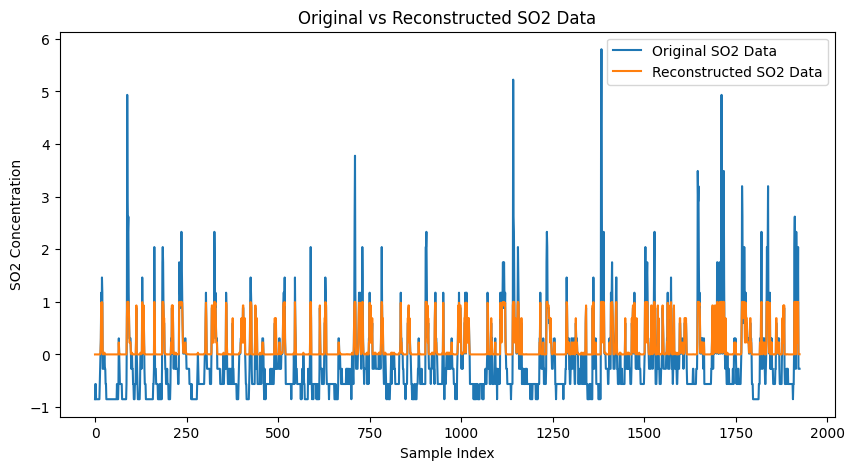

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
data = pd.read_csv('/content/so2_20180101_20231031 (1).csv')


#select the column 'V' for prediction
selected_column='33204020'

#split  the selected column into training and testing sets
train_data,test_data=train_test_split(data[selected_column],test_size=0.2,shuffle=False)

# Convert to numpy arrays and reshape to 2D (required for model input)
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

# Standardize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define the size of the input, encoding, and decoded layers
input_dim = train_data.shape[1]  # Single feature
encoding_dim = 32  # Can be changed to any number

# Input layer
input_data = Input(shape=(input_dim,))

# Encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_data)

# Decoding layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_data, decoded)

# Encoder model
encoder = Model(input_data, encoded)

# Decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile and train the Autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history = autoencoder.fit(train_data, train_data,
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2)

# Make predictions (reconstruction of the input data)
decoded_data = autoencoder.predict(test_data)

# Calculate RMSE
mse = mean_squared_error(test_data, decoded_data)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

# Plot original and reconstructed SO2 data
plt.figure(figsize=(10, 5))
plt.plot(test_data, label='Original SO2 Data')
plt.plot(decoded_data, label='Reconstructed SO2 Data')
plt.legend()
plt.title('Original vs Reconstructed SO2 Data')
plt.xlabel('Sample Index')
plt.ylabel('SO2 Concentration')
plt.show()
